**Dataset:  pima-indians-diabetes.data** is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 

The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Source: Kaggle
https://www.kaggle.com/uciml/pima-indians-diabetes-database


|SlNo|Variable|Description|
|---|--------------|--------------------------------|
|1|Pregnancies|Number of times pregnant|
|2|Glucose|Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
|3|BloodPressure|Diastolic blood pressure (mm Hg)|
|4|SkinThickness|Triceps skin fold thickness (mm)|
|5|Insulin|2-Hour serum insulin (mu U/ml)|
|6|BMI|Body mass index (weight in kg/(height in m)^2)|
|7|DiabetesPedigreeFunction|Diabetes pedigree function|
|8|Age|Age (years)|
|9|Outcome|Class variable (0 or 1)|

### To print the elapsed time, first get the start time

In [1]:
import time
from datetime import timedelta

start_time = time.time()

In [2]:
import pandas            as  pd
import numpy             as  np
import seaborn           as  sns
import matplotlib.pyplot as  plt
import statsmodels.api   as  sm
import sys, os

sys.path.insert(0, 'D:/Training/Python') 

from   common           import  draw_boxplot, draw_hist, split_target_predictor, split_train_test 

from   model_building   import  check_linearity, get_significant_vars, logit_reg, compare_models 

print("\nCurrent working directory %s" %os.getcwd())

os.chdir('D:/Training/Python/Data')

names  = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'outcome'] 
data   = pd.read_csv('D:/ML/data/pima-indians-diabetes.data.csv' , names = names, header =0,index_col=0) 
target = 'outcome'
n      = data.shape[0]


Current working directory D:\RRD\Courseware\ipynb files


### Data structure

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 1 to 1
Data columns (total 8 columns):
plas       767 non-null int64
pres       767 non-null int64
skin       767 non-null int64
test       767 non-null int64
mass       767 non-null float64
pedi       767 non-null float64
age        767 non-null int64
outcome    767 non-null int64
dtypes: float64(2), int64(6)
memory usage: 53.9 KB
None


In [4]:
data.dtypes

plas         int64
pres         int64
skin         int64
test         int64
mass       float64
pedi       float64
age          int64
outcome      int64
dtype: object

### Get first six rows of data

In [5]:
print(data.head())

      plas  pres  skin  test  mass   pedi  age  outcome
preg                                                   
1       85    66    29     0  26.6  0.351   31        0
8      183    64     0     0  23.3  0.672   32        1
1       89    66    23    94  28.1  0.167   21        0
0      137    40    35   168  43.1  2.288   33        1
5      116    74     0     0  25.6  0.201   30        0


In [6]:
print(data.describe())

             plas        pres        skin        test        mass        pedi  \
count  767.000000  767.000000  767.000000  767.000000  767.000000  767.000000   
mean   120.859192   69.101695   20.517601   79.903520   31.990482    0.471674   
std     31.978468   19.368155   15.954059  115.283105    7.889091    0.331497   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.078000   
25%     99.000000   62.000000    0.000000    0.000000   27.300000    0.243500   
50%    117.000000   72.000000   23.000000   32.000000   32.000000    0.371000   
75%    140.000000   80.000000   32.000000  127.500000   36.600000    0.625000   
max    199.000000  122.000000   99.000000  846.000000   67.100000    2.420000   

              age     outcome  
count  767.000000  767.000000  
mean    33.219035    0.348110  
std     11.752296    0.476682  
min     21.000000    0.000000  
25%     24.000000    0.000000  
50%     29.000000    0.000000  
75%     41.000000    1.000000  
max     81.000

### Split data into predictor variables data and target variable data

In [7]:
print(list(data.columns.values))

['plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'outcome']


## Logistic Regression

### Logistic Regression Assumptions

1) Binary logistic regression requires the target / dependent variable to be binary. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome (such as Success etc..).
2) Only the meaningful variables should be included.
3) The predictor variables should not be correlated to each other meaning the model should have little or no multicollinearity.
4) The independent variables are linearly related to the log odds.
5) Logistic regression requires quite a large number of observations.

#### 1) Binary logistic regression requires the target / dependent variable to be binary.

For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome. In our case it is class 1 -

#### 2) Only the meaningful variables should be included.

We have ensured that there are no unwanted variables selected for model building.

#### 3) Absence of multicollinearity

Let us find the correlation among numerical variables.

In [8]:
num_variables  = data.select_dtypes(include=[np.number]).columns.tolist()
num_variables.remove(target) 
print(num_variables)

['plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']


In [9]:
df_num        = data[np.intersect1d(data.columns, num_variables)]
print(df_num .corr())

           age      mass      pedi      plas      pres      skin      test
age   1.000000  0.035911  0.032738  0.262408  0.239571 -0.115873 -0.040942
mass  0.035911  1.000000  0.140546  0.220955  0.281777  0.392553  0.198111
pedi  0.032738  0.140546  1.000000  0.136903  0.041180  0.183498  0.185579
plas  0.262408  0.220955  0.136903  1.000000  0.152498  0.056381  0.332383
pres  0.239571  0.281777  0.041180  0.152498  1.000000  0.207308  0.089098
skin -0.115873  0.392553  0.183498  0.056381  0.207308  1.000000  0.437974
test -0.040942  0.198111  0.185579  0.332383  0.089098  0.437974  1.000000


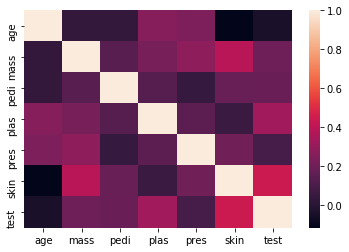

In [10]:
sns.heatmap(df_num.corr())
plt.show()

#### 4) The independent variables are linearly related to the log odds

We need to check the assumption of Independent variables are linearly related to the log odds.

One way to checking this is to plot the Independent variables in question and look for an S-shaped curve.

In [11]:
df2 = data

D:\Python\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


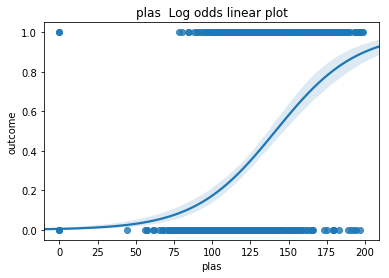

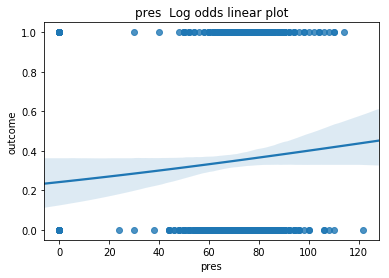

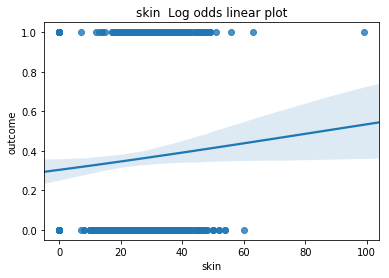

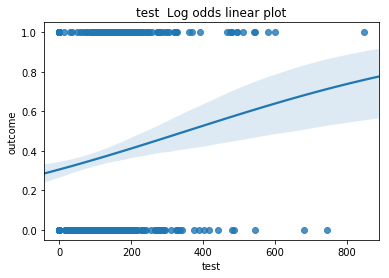

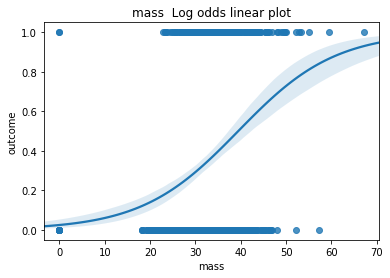

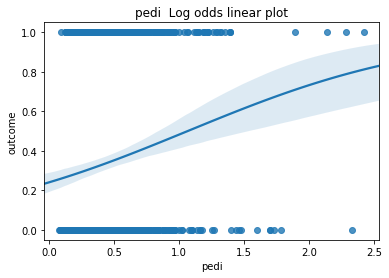

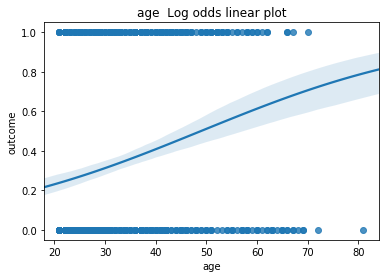

In [12]:
for i in range(len(num_variables)):
    title = num_variables[i] + '  Log odds linear plot'
    xvar  = num_variables[i]
    check_linearity(xvar,    df2, title, target)

#### 5) Logistic regression requires quite a large number of observations.

A general rule of thumb is that at least 10 per variable.

We have 768 observations and 9 variables; so we have approximately 85 observations per variable.

### Model Building

Logistic Regression is a classification algorithm that is used to predict the probability of a target variable which is categorical. Here, the target variable is a dichotomous variable that contains data coded as 1 (desired outcome like success) or 0 (Example: failure).

We have two popular options for building a logistic regression model; they are scikit-learn and StatsModels.

Good thing about statsmodels is the summary output it produces. Students with R back ground will like it as it looks familiar.

In [13]:
X, Y       = split_target_predictor(data, 'outcome')
X_names    = list(data.columns)

In [14]:
X_names.remove('outcome')
X          = pd.DataFrame(X)
X.columns  = X_names 

print(X.head().T)

           0        1       2        3        4
plas  85.000  183.000  89.000  137.000  116.000
pres  66.000   64.000  66.000   40.000   74.000
skin  29.000    0.000  23.000   35.000    0.000
test   0.000    0.000  94.000  168.000    0.000
mass  26.600   23.300  28.100   43.100   25.600
pedi   0.351    0.672   0.167    2.288    0.201
age   31.000   32.000  21.000   33.000   30.000


In [15]:
import numpy as np
X_train, X_test, Y_train, Y_test = split_train_test(X, Y, 0.3, 12345)

In [16]:
vals, counts = np.unique(Y_test, return_counts = True)
print(vals, counts)

[0. 1.] [152  79]


In [17]:
print("\nShape: Total observations %d Total features %d" %(X_train.shape[0], X_train.shape[1]))


Shape: Total observations 536 Total features 7


In [18]:
logit = sm.Logit( Y_train, sm.add_constant( X_train ) )
lg    = logit.fit()

Optimization terminated successfully.
         Current function value: 0.456024
         Iterations 7


### Report Psuedo R-square, model coefficients and p-value

In [19]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  536
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            7
Date:                Thu, 30 May 2019   Pseudo R-squ.:                  0.2962
Time:                        09:29:54   Log-Likelihood:                -244.43
converged:                       True   LL-Null:                       -347.28
                                        LLR p-value:                 7.119e-41
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.3571      0.904    -10.351      0.000     -11.129      -7.585
plas           0.0344      0.004      7.765      0.000       0.026       0.043
pres          -0.0164      0.007     -2.467      0.0

**Observation**

We observe that the McFadden R square (Pseudo R square) is 25.50 % and the model fitness is good.
This McFadden approach is one minus the ratio of two log likelihoods. The numerator is the log likelihood of the logit model selected and the denominator is the log likelihood if the model just had an intercept.

A goodness of fit using McFadden‟s pseudo r square (ρ^2) is used for fitting the overall model. McFadden suggested ρ^2 values of between 0.2 and 0.4 should be taken to represent a very good fit of the model (Louviere et al.,2000).
http://www.lifesciencesite.com/lsj/life1002/286_B01288life1002_2028_2036.pdf

### List the significant variables at 5% level of significance

In [20]:
significant_vars = get_significant_vars( lg, sig_level = 0.05 )
print(significant_vars)

['const', 'plas', 'pres', 'mass', 'pedi', 'age']


**Observation**

The following variables are significant at 5 % level of significance:

| SlNo | Significant variable |                      | 
| ---- | -------------------- | -------------------- |   
| 1 | preg | Number of times pregnant | 
| 2 | plas | Plasma glucose concentration a 2 hours in an oral glucose tolerance test | 
| 3 | pres | Diastolic blood pressure (mm Hg) | 
| 4 | mass | Body mass index (weight in kg/(height in m)^2) | 
| 5 | pedi | Diabetes pedigree function | 


### Get Odds ratio

In [21]:
drop_vars = X_names
print(type(drop_vars))
significant_vars.remove('const')

<class 'list'>


In [22]:
print(significant_vars)
print(drop_vars)

['plas', 'pres', 'mass', 'pedi', 'age']
['plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']


In [23]:
for i in range(len(significant_vars)):
    print(significant_vars[i])
    rm = significant_vars[i]
    drop_vars.remove(rm)

print(drop_vars)

plas
pres
mass
pedi
age
['skin', 'test']


In [24]:
print(np.exp(lg.params))
print(type(np.exp(lg.params)))

const    0.000086
plas     1.035004
pres     0.983691
skin     0.996911
test     0.998467
mass     1.120315
pedi     3.205378
age      1.044562
dtype: float64
<class 'pandas.core.series.Series'>


In [25]:
drop_vars.append('const')

In [26]:
np.exp(lg.params).reindex(significant_vars).sort_values(ascending = False)
 

pedi    3.205378
mass    1.120315
age     1.044562
plas    1.035004
pres    0.983691
dtype: float64

### Odds Ratio Interpretation for significant variables

Holding other things constant:

| Slno | Inference |
| ----- | ------------------------------------- |
| 1 | For a patient, one unit increase in Diabetes pedigree function, the odds of getting Diabetes increases by 114%.|
| 2 | For a patient, one more pregnancy, the odds of getting Diabetes increases by 13%.|
| 3 | For a patient, one unit increase in BMI, the odds of getting Diabetes increases by 9%.|
| 4 | For a patient, one unit increase in plasma glucose tolerance test, the odds of getting Diabetes increases by 3%.|
| 5 | For a patient, one unit (mm/Hg) increase in Diastolic blood pressure (mm Hg), the odds of getting Diabetes decreases by 1%.|





Training Data
[[315  33]
 [ 77 111]]


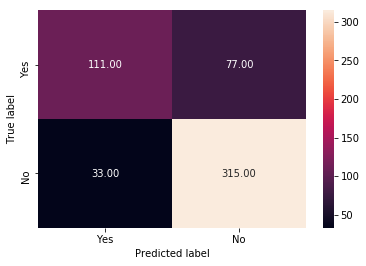

Training Accuracy: 79.478%

Testing Data
[[132  20]
 [ 41  38]]


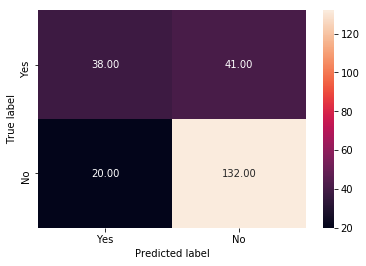

Test Accuracy: 73.593%

Training data
             precision    recall  f1-score   support

        0.0       0.80      0.91      0.85       348
        1.0       0.77      0.59      0.67       188

avg / total       0.79      0.79      0.79       536


Testing data
             precision    recall  f1-score   support

        0.0       0.76      0.87      0.81       152
        1.0       0.66      0.48      0.55        79

avg / total       0.73      0.74      0.72       231


Training data


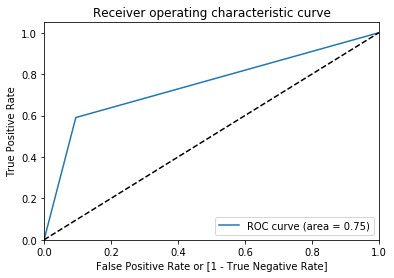


Testing data


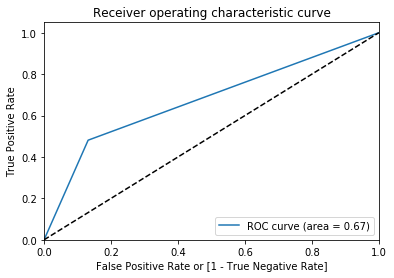


With K fold cross validation

Scoring:  accuracy
[0.81481481 0.7962963  0.83333333 0.85185185 0.74074074 0.77777778
 0.71698113 0.77358491 0.79245283 0.81132075]

Accuracy: 0.791 (0.039)

Scoring:  precision
[0.85714286 0.73333333 0.58333333 0.875      0.71428571 0.82352941
 0.66666667 0.83333333 0.66666667 0.85714286]

Precision: 0.761 (0.096)

Scoring:  recall
[0.6        0.61111111 0.63636364 0.7        0.5        0.60869565
 0.5        0.5        0.625      0.6       ]

Recall: 0.588 (0.064)

Scoring:  roc_auc
[0.84411765 0.85339506 0.75475687 0.89852941 0.86764706 0.86115007
 0.80606061 0.82121212 0.81418919 0.87575758]

AUROC: 0.840 (0.039)
None


In [27]:
n_splits, random_state = 10, 12345
                     
print(logit_reg(n_splits, random_state, X_train, X_test, Y_train, Y_test ))

### To get the elapsed time, get the end time of processing

In [28]:
logit_elapsed_time_secs = time.time() - start_time

logit_elapsed_time_msg = "LR model - Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(logit_elapsed_time_secs))

print(logit_elapsed_time_msg)   

LR model - Execution took: 0:00:23 secs (Wall clock time)


## Decision Tree model - CART

Bagging performs best with algorithms that have high variance. A popular example are decision trees, often considered without pruning. 

In [29]:
CART_start_time = time.time()

Here we use the BaggingClassifier with the Classification and Regression Trees algorithm (DecisionTreeClassifier).
A total of 100 tress are created.

In [30]:
from sklearn.ensemble         import  BaggingClassifier
from sklearn.tree             import  DecisionTreeClassifier
from sklearn.model_selection  import  KFold, cross_val_score

D:\Python\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [31]:
cart      = DecisionTreeClassifier()
seed      = 71
kfold     = KFold(n_splits = 10, random_state = seed)
num_trees = 100
model     = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = seed)
results   = cross_val_score(model,  X_train, Y_train, cv = kfold)
print(results) 

[0.74074074 0.7962963  0.87037037 0.81481481 0.75925926 0.74074074
 0.73584906 0.66037736 0.79245283 0.79245283]


In [32]:
CART_elapsed_time_secs = time.time() - start_time

CART_elapsed_time_msg = "LR model - Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(CART_elapsed_time_secs))

print(CART_elapsed_time_msg)   

LR model - Execution took: 0:00:25 secs (Wall clock time)


In [33]:
MODELS_start_time = time.time() 

In [34]:
from   common           import  draw_boxplot, draw_hist, split_target_predictor, split_train_test 

from   model_building   import  check_linearity, get_significant_vars, logit_reg, compare_models 

roc_auc

 n_splits 10 random_state 123456
LR: 0.839682 (0.039432)

 n_splits 10 random_state 123456
KNN: 0.757453 (0.061284)

 n_splits 10 random_state 123456
CART: 0.690885 (0.052823)

 n_splits 10 random_state 123456
NB: 0.825334 (0.028637)

 n_splits 10 random_state 123456
RF: 0.794664 (0.049182)


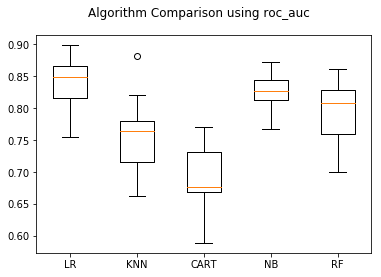

precision

 n_splits 10 random_state 123456
LR: 0.761043 (0.096403)

 n_splits 10 random_state 123456
KNN: 0.619452 (0.103204)

 n_splits 10 random_state 123456
CART: 0.571136 (0.114551)

 n_splits 10 random_state 123456
NB: 0.679654 (0.109130)

 n_splits 10 random_state 123456
RF: 0.690562 (0.060528)


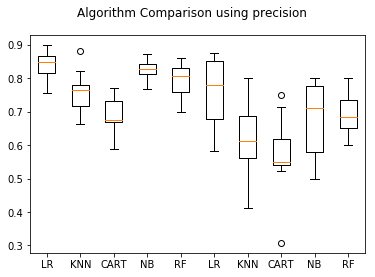

recall

 n_splits 10 random_state 123456
LR: 0.588117 (0.063823)

 n_splits 10 random_state 123456
KNN: 0.592465 (0.128150)

 n_splits 10 random_state 123456
CART: 0.581551 (0.132312)

 n_splits 10 random_state 123456
NB: 0.600904 (0.079742)

 n_splits 10 random_state 123456
RF: 0.549231 (0.133315)


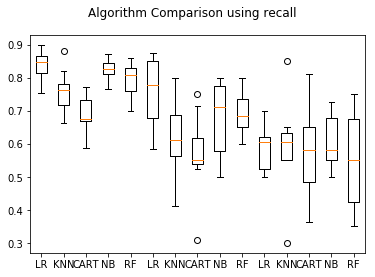

In [35]:
n_splits     = 10
random_state = 123456

compare_models(n_splits, random_state, X_train, Y_train)

In [36]:
MODELS_elapsed_time_secs = time.time() - start_time

MODELS_elapsed_time_msg = "Model comparison - Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(CART_elapsed_time_secs))

print(MODELS_elapsed_time_msg)

Model comparison - Execution took: 0:00:25 secs (Wall clock time)
